# I’m Something of a Painter Myself

### Use GANs to create art - will you be the next Monet?

### Description

*“Every artist dips his brush in his own soul, and paints his own nature into his pictures.”*

-Henry Ward Beecher

We recognize the works of artists through their unique style, such as color choices or brush strokes. The “je ne sais quoi” of artists like Claude Monet can now be imitated with algorithms thanks to generative adversarial networks (GANs). In this getting started competition, you will bring that style to your photos or recreate the style from scratch!

Computer vision has advanced tremendously in recent years and GANs are now capable of mimicking objects in a very convincing way. But creating museum-worthy masterpieces is thought of to be, well, more art than science. So can (data) science, in the form of GANs, trick classifiers into believing you’ve created a true Monet? That’s the challenge you’ll take on!

### The Challenge:

A GAN consists of at least two neural networks: a generator model and a discriminator model. The generator is a neural network that creates the images. For our competition, you should generate images in the style of Monet. This generator is trained using a discriminator.

The two models will work against each other, with the generator trying to trick the discriminator, and the discriminator trying to accurately classify the real vs. generated images.

Your task is to build a GAN that generates 7,000 to 10,000 Monet-style images.

### Dataset Description

The dataset contains four directories: monet_tfrec, photo_tfrec, monet_jpg, and photo_jpg. The monet_tfrec and monet_jpg directories contain the same painting images, and the photo_tfrec and photo_jpg directories contain the same photos.

We recommend using TFRecords as a Getting Started competition is a great way to become more familiar with a new data format, but JPEG images have also been provided.

The monet directories contain Monet paintings. Use these images to train your model.

The photo directories contain photos. Add Monet-style to these images and submit your generated jpeg images as a zip file. Other photos outside of this dataset can be transformed but keep your submission file limited to 10,000 images.

Note: Monet-style art can be created from scratch using other GAN architectures like DCGAN. The submitted image files do not necessarily have to be transformed photos.

Check out the CycleGAN dataset to experiment with the artistic style of other artists.

### Files

monet_jpg - 300 Monet paintings sized 256x256 in JPEG format

monet_tfrec - 300 Monet paintings sized 256x256 in TFRecord format

photo_jpg - 7028 photos sized 256x256 in JPEG format

photo_tfrec - 7028 photos sized 256x256 in TFRecord format


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.linear_model import *
from math import *
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import os

In [79]:
files_monet_jpg = os.listdir("photos/monet_jpg")
files_photo_jpg = os.listdir("photos/photo_jpg")
files_monet_jpg_path = []
files_photo_jpg_path = []
for i in files_monet_jpg:
    files_monet_jpg_path.append("photos/monet_jpg/"+i)
for i in files_photo_jpg:
    files_photo_jpg_path.append("photos/photo_jpg/"+i)

In [80]:
files_monet_jpg_path

['photos/monet_jpg/1f22663e72.jpg',
 'photos/monet_jpg/50855dd324.jpg',
 'photos/monet_jpg/66a144f547.jpg',
 'photos/monet_jpg/463835bbc6.jpg',
 'photos/monet_jpg/2acfbab228.jpg',
 'photos/monet_jpg/6bfbd1df5b.jpg',
 'photos/monet_jpg/c7d8142152.jpg',
 'photos/monet_jpg/e753318d04.jpg',
 'photos/monet_jpg/4660310c3e.jpg',
 'photos/monet_jpg/990ed28f62.jpg',
 'photos/monet_jpg/632ddbc784.jpg',
 'photos/monet_jpg/058f878b7c.jpg',
 'photos/monet_jpg/8e5ff15568.jpg',
 'photos/monet_jpg/a030bc32e6.jpg',
 'photos/monet_jpg/de6f71b00f.jpg',
 'photos/monet_jpg/2cca56415e.jpg',
 'photos/monet_jpg/ec78d80dbd.jpg',
 'photos/monet_jpg/8077b7e9e7.jpg',
 'photos/monet_jpg/295eb5c521.jpg',
 'photos/monet_jpg/09b76b6471.jpg',
 'photos/monet_jpg/7d64c3100c.jpg',
 'photos/monet_jpg/79292e1434.jpg',
 'photos/monet_jpg/da72006ef5.jpg',
 'photos/monet_jpg/8044a92484.jpg',
 'photos/monet_jpg/6ee7c39dbc.jpg',
 'photos/monet_jpg/661e374153.jpg',
 'photos/monet_jpg/8cfd45a2e2.jpg',
 'photos/monet_jpg/c2576267d

In [81]:
files_photo_jpg_path

['photos/photo_jpg/5a384bf8d9.jpg',
 'photos/photo_jpg/bb15fcc4ff.jpg',
 'photos/photo_jpg/39c1270676.jpg',
 'photos/photo_jpg/506fdcb3c1.jpg',
 'photos/photo_jpg/63f6cea734.jpg',
 'photos/photo_jpg/7b95afc20a.jpg',
 'photos/photo_jpg/0723d52098.jpg',
 'photos/photo_jpg/3be1aea5fc.jpg',
 'photos/photo_jpg/114692dc5b.jpg',
 'photos/photo_jpg/d665568cdf.jpg',
 'photos/photo_jpg/ada64f6f98.jpg',
 'photos/photo_jpg/7a317ade8c.jpg',
 'photos/photo_jpg/9c92f8345f.jpg',
 'photos/photo_jpg/f40b429650.jpg',
 'photos/photo_jpg/f298108b32.jpg',
 'photos/photo_jpg/6f8cb591c0.jpg',
 'photos/photo_jpg/8f9cc89fc1.jpg',
 'photos/photo_jpg/9079fe9d9c.jpg',
 'photos/photo_jpg/f6798eb074.jpg',
 'photos/photo_jpg/9588a52282.jpg',
 'photos/photo_jpg/0cdfbb28e6.jpg',
 'photos/photo_jpg/1467b3a6ac.jpg',
 'photos/photo_jpg/d5a509f069.jpg',
 'photos/photo_jpg/75ae690a9b.jpg',
 'photos/photo_jpg/a777303bee.jpg',
 'photos/photo_jpg/45ae43ca11.jpg',
 'photos/photo_jpg/27b87e7785.jpg',
 'photos/photo_jpg/94af68858

In [84]:
img = tf.keras.preprocessing.image.load_img(path="photos/monet_jpg/0a5075d42a.jpg")

In [89]:
tens = tf.convert_to_tensor(img)

In [104]:
X_train = []
for i in files_photo_jpg_path:
    x
    tensor = tf.convert_to_tensor(img)
    X_train.append(tensor)
X_train = np.array(X_train)
X_train.shape

(7038, 256, 256, 3)

In [105]:
y_train = []
for i in files_monet_jpg_path:
    img = tf.keras.preprocessing.image.load_img(path=i)
    tensor = tf.convert_to_tensor(img)
    y_train.append(tensor)
y_train = np.array(y_train)
y_train.shape

(300, 256, 256, 3)

In [106]:
7038*300

2111400

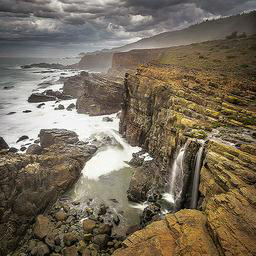

In [114]:
tf.keras.preprocessing.image.load_img(files_photo_jpg_path[0])

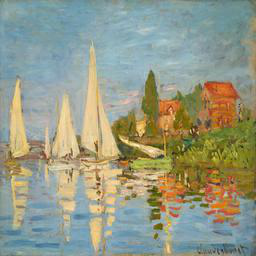

In [115]:
tf.keras.preprocessing.image.load_img(files_monet_jpg_path[0])